In [116]:
import pandas as pd
import numpy as np
import requests
import time
from matplotlib import pyplot as plt
from config import v_key

In [117]:
d_state_covid = pd.read_csv("Data/NJ state time series.csv" )
#d_state_covid.head()
len(d_state_covid)

11319

In [168]:
#getting columns needed for vaccination data
d_state_covid_conv_df=d_state_covid[['date','county','fips','actuals.cases','actuals.deaths','actuals.newCases',
         'actuals.vaccinationsInitiated','actuals.vaccinationsCompleted',
         'actuals.vaccinesAdministered','actuals.newDeaths']]
clean_vaccine_df =d_state_covid_conv_df.dropna(subset=['actuals.cases','actuals.deaths','actuals.newCases',
                                                    'actuals.vaccinationsInitiated','actuals.vaccinationsCompleted',
                                                    'actuals.vaccinesAdministered','actuals.newDeaths'])
clean_vaccine_df.head()
#clean_vaccine_df.dtypes
#len(clean_vaccine_df)

,date,county,fips,actuals.cases,actuals.deaths,actuals.newCases,actuals.vaccinationsInitiated,actuals.vaccinationsCompleted,actuals.vaccinesAdministered,actuals.newDeaths
393,2021-02-18,Atlantic County,34001,23833.0,546.0,153.0,35117.0,14104.0,49228.0,10.0
394,2021-02-19,Atlantic County,34001,23909.0,549.0,76.0,35322.0,14712.0,50038.0,3.0
395,2021-02-20,Atlantic County,34001,24048.0,551.0,139.0,35390.0,15004.0,50399.0,2.0
396,2021-02-21,Atlantic County,34001,24131.0,551.0,83.0,36181.0,15890.0,52166.0,0.0
397,2021-02-22,Atlantic County,34001,24207.0,552.0,76.0,36371.0,16576.0,52947.0,1.0


In [126]:
population_url ="https://api.covidactnow.org/v2/county/NJ.json?apiKey=" + v_key
population_response = requests.get(population_url).json()
#getting population data
fips=[]
population = []

for county_row in population_response:
    fips.append(int(county_row['fips']))
    population.append(county_row['population'])
    
population_dict = {
     "fips": fips,
     "Total Population": population}
    
population_data_total  = pd.DataFrame(population_dict)
population_data_total.head()


,fips,Total Population
0,34001,263670
1,34003,932202
2,34005,445349
3,34007,506471
4,34009,92039


In [127]:
# merging vaccination data with population
vaccines_mer_pd = clean_vaccine_df.merge(population_data_total, how ="left", on ="fips")
vaccines_mer_pd.head()

,date,county,fips,actuals.cases,actuals.deaths,actuals.newCases,actuals.vaccinationsInitiated,actuals.vaccinationsCompleted,actuals.vaccinesAdministered,actuals.newDeaths,Total Population
0,2021-02-18,Atlantic County,34001,23833.0,546.0,153.0,35117.0,14104.0,49228.0,10.0,263670
1,2021-02-19,Atlantic County,34001,23909.0,549.0,76.0,35322.0,14712.0,50038.0,3.0,263670
2,2021-02-20,Atlantic County,34001,24048.0,551.0,139.0,35390.0,15004.0,50399.0,2.0,263670
3,2021-02-21,Atlantic County,34001,24131.0,551.0,83.0,36181.0,15890.0,52166.0,0.0,263670
4,2021-02-22,Atlantic County,34001,24207.0,552.0,76.0,36371.0,16576.0,52947.0,1.0,263670


In [128]:
#vaccines_mer_pd

In [129]:
percent_counties_vaccine = pd.DataFrame(vaccines_mer_pd[["date","fips","county"]])

percent_counties_vaccine.head()


,date,fips,county
0,2021-02-18,34001,Atlantic County
1,2021-02-19,34001,Atlantic County
2,2021-02-20,34001,Atlantic County
3,2021-02-21,34001,Atlantic County
4,2021-02-22,34001,Atlantic County


In [130]:
percent_counties_vaccine["Percent completed"]= vaccines_mer_pd["actuals.vaccinationsCompleted"]/vaccines_mer_pd["Total Population"]*100
percent_counties_vaccine["Percent initiated"]= vaccines_mer_pd["actuals.vaccinationsInitiated"]/vaccines_mer_pd["Total Population"]*100
percent_counties_vaccine["Percent of Cases/Total Population"] =vaccines_mer_pd['actuals.cases']/vaccines_mer_pd["Total Population"]*100 
percent_counties_vaccine

,date,fips,county,Percent completed,Percent initiated,Percent of Cases/Total Population
0,2021-02-18,34001,Atlantic County,5.349111,13.318542,9.038950
1,2021-02-19,34001,Atlantic County,5.579702,13.396291,9.067774
2,2021-02-20,34001,Atlantic County,5.690446,13.422081,9.120492
3,2021-02-21,34001,Atlantic County,6.026472,13.722077,9.151970
4,2021-02-22,34001,Atlantic County,6.286646,13.794137,9.180794
...,...,...,...,...,...,...
2887,2021-07-08,34041,Warren County,44.491626,48.749371,9.552851
2888,2021-07-09,34041,Warren County,44.544824,48.797819,9.556651
2889,2021-07-10,34041,Warren County,44.618921,48.869066,9.557601
2890,2021-07-11,34041,Warren County,44.705368,48.927014,9.562351


In [143]:
Data_date = "2021-06-26"
percent_vaccine = percent_counties_vaccine.loc[percent_counties_vaccine["date"]==Data_date].sort_values(by=['Percent completed'], ascending =False)
percent_vaccine


,date,fips,county,Percent completed,Percent initiated,Percent of Cases/Total Population
1902,2021-06-26,34027,Morris County,61.019224,67.342557,10.238388
2456,2021-06-26,34035,Somerset County,60.286866,67.868630,9.186645
669,2021-06-26,34009,Cape May County,56.168581,61.013266,10.090288
263,2021-06-26,34003,Bergen County,55.749934,61.818147,11.251317
1627,2021-06-26,34023,Middlesex County,54.320524,61.947102,11.233701
1348,2021-06-26,34019,Hunterdon County,53.785046,61.392125,7.941562
1486,2021-06-26,34021,Mercer County,53.138013,61.422584,9.302452
392,2021-06-26,34005,Burlington County,53.057041,57.837337,9.962973
1764,2021-06-26,34025,Monmouth County,52.980389,59.001608,12.278218
533,2021-06-26,34007,Camden County,50.898077,56.662672,11.035775


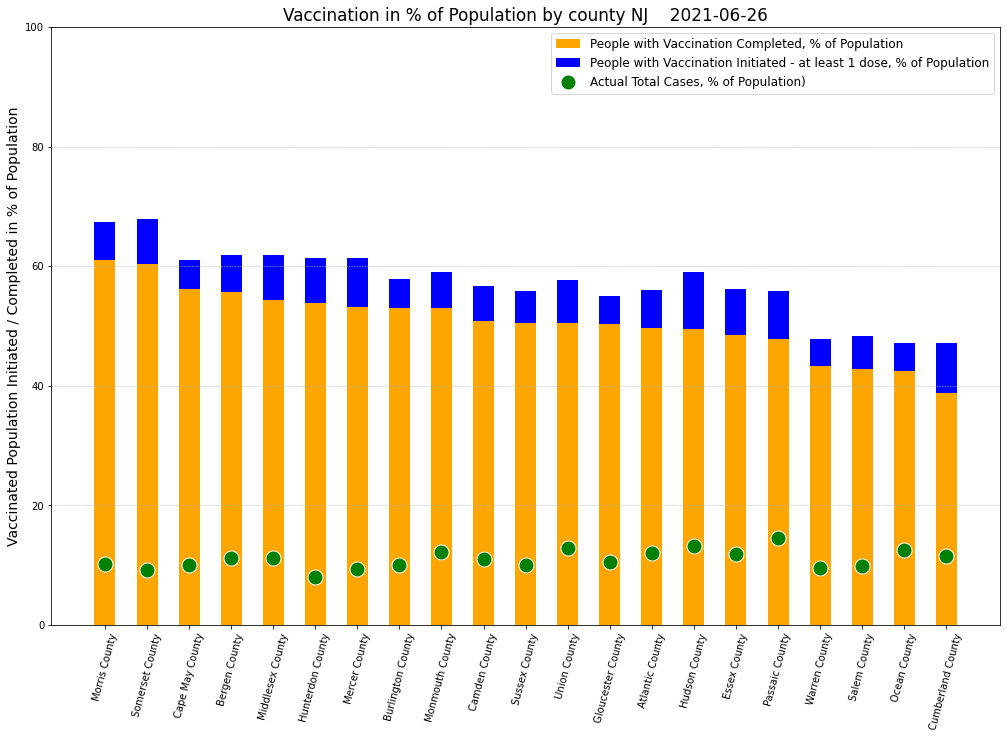

In [169]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
header = ['People with Vaccination Completed, % of Population','People with Vaccination Initiated - at least 1 dose, % of Population',
           'Actual Total Cases, % of Population)']
dataset = [percent_vaccine["Percent completed"],percent_vaccine["Percent initiated"]]
X_AXIS = percent_vaccine["county"]
Y_AXIS = percent_vaccine["Percent of Cases/Total Population"]

matplotlib.rc('font', serif='Arial')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 14})

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(17.0, 11.0)

configs = dataset[0]
N = len(configs)
ind = np.arange(N)
width = 0.5


 
p1 = plt.bar(ind, dataset[0], width, color='orange')
p2 = plt.bar(ind, np.array(dataset[1])-np.array(dataset[0]), width, bottom=dataset[0], color='b')
p =  plt.plot(X_AXIS,Y_AXIS, color = "white", marker = 'o', ms= 15, mfc = "g", linewidth = 0.1) 

plt.ylim([0,100])
plt.yticks(fontsize=10)
plt.ylabel("Vaccinated Population Initiated / Completed in % of Population", fontsize=14)
plt.xticks(ind, X_AXIS, fontsize=10, rotation=75)
plt.title("Vaccination in % of Population by county NJ    "  +  (Data_date))
plt.legend((p1[0], p2[0], p[0]), (header[0], header[1], header[2]), fontsize=12)
plt.grid(axis = "y", linestyle = "--", linewidth = 0.5)
plt.savefig("../Images/Vaccination_counies_NJ_Jun2021.png")

plt.show()



In [15]:
time_vaccine_df = pd.DataFrame(vaccines_mer_pd)
time_vaccine_df.head()
time_vaccine_df =time_vaccine_df.sort_values(['county', 'date'])
time_vaccine_df["delta_init"]=time_vaccine_df['actuals.vaccinationsInitiated'].diff()
index_county_df = time_vaccine_df.set_index(time_vaccine_df["county"]).fillna(0) 
index_county_df.loc[index_county_df['delta_init'] <0]=0

index_county_df.head(10)

,date,county,fips,actuals.cases,actuals.deaths,actuals.newCases,actuals.vaccinationsInitiated,actuals.vaccinationsCompleted,actuals.vaccinesAdministered,actuals.newDeaths,Total Population,delta_init
county,,,,,,,,,,,,
Atlantic County,2021-02-18,Atlantic County,34001,23833.0,546.0,153.0,35117.0,14104.0,49228.0,10.0,263670,0.0
Atlantic County,2021-02-19,Atlantic County,34001,23909.0,549.0,76.0,35322.0,14712.0,50038.0,3.0,263670,205.0
Atlantic County,2021-02-20,Atlantic County,34001,24048.0,551.0,139.0,35390.0,15004.0,50399.0,2.0,263670,68.0
Atlantic County,2021-02-21,Atlantic County,34001,24131.0,551.0,83.0,36181.0,15890.0,52166.0,0.0,263670,791.0
Atlantic County,2021-02-22,Atlantic County,34001,24207.0,552.0,76.0,36371.0,16576.0,52947.0,1.0,263670,190.0
Atlantic County,2021-02-23,Atlantic County,34001,24298.0,559.0,91.0,37625.0,17338.0,53840.0,7.0,263670,1254.0
Atlantic County,2021-02-24,Atlantic County,34001,24405.0,562.0,107.0,37854.0,17929.0,55796.0,3.0,263670,229.0
Atlantic County,2021-02-25,Atlantic County,34001,24515.0,563.0,110.0,39493.0,19246.0,58753.0,1.0,263670,1639.0
Atlantic County,2021-02-26,Atlantic County,34001,24606.0,566.0,91.0,39622.0,19393.0,59029.0,3.0,263670,129.0


### Vaccination - Daily Cases, February 2021 - July 2021  
* time frame was adjusted to data, as when available for all counties in NJ 

In [16]:
#index_county_df = time_vaccine_df.set_index(time_vaccine_df["county"])
county_x= index_county_df.loc[index_county_df['county'] == "Morris County"]
county_x


,date,county,fips,actuals.cases,actuals.deaths,actuals.newCases,actuals.vaccinationsInitiated,actuals.vaccinationsCompleted,actuals.vaccinesAdministered,actuals.newDeaths,Total Population,delta_init
county,,,,,,,,,,,,
Morris County,2021-02-19,Morris County,34027,36077.0,1103.0,179.0,77921.0,38427.0,116374.0,0.0,491845,898.0
Morris County,2021-02-20,Morris County,34027,36220.0,1109.0,143.0,78499.0,39229.0,117778.0,6.0,491845,578.0
Morris County,2021-02-21,Morris County,34027,36343.0,1110.0,123.0,79729.0,41080.0,122069.0,1.0,491845,1230.0
Morris County,2021-02-22,Morris County,34027,36515.0,1111.0,172.0,82667.0,42928.0,125596.0,1.0,491845,2938.0
Morris County,2021-02-23,Morris County,34027,36691.0,1113.0,176.0,85213.0,44157.0,126924.0,2.0,491845,2546.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Morris County,2021-07-08,Morris County,34027,50451.0,1241.0,12.0,339273.0,309634.0,633865.0,0.0,491845,459.0
Morris County,2021-07-09,Morris County,34027,50462.0,1241.0,11.0,339725.0,310246.0,634901.0,0.0,491845,452.0
Morris County,2021-07-10,Morris County,34027,50485.0,1241.0,23.0,340081.0,310686.0,635650.0,0.0,491845,356.0


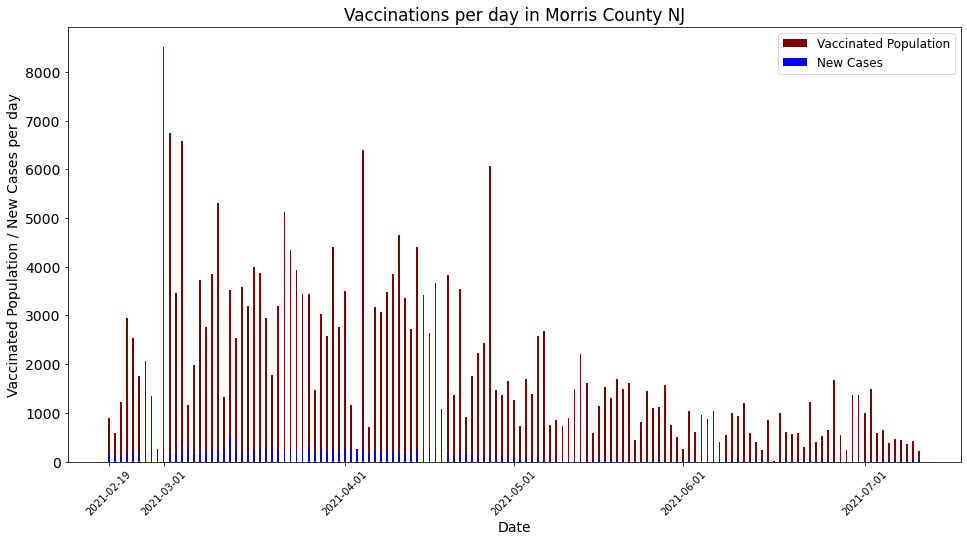

In [183]:
x_axis = county_x["date"]
values = county_x['delta_init']
  
fig = plt.figure(figsize = (16, 8))
fig.tight_layout()
# creating the bar plot
p1_M = plt.bar(x_axis, values, color ='maroon', width = 0.3)
p2_M = plt.bar(x_axis, county_x['actuals.newCases'], color ='blue', width = 0.3)
  
plt.xlabel("Date")
plt.ylabel("Vaccinated Population / New Cases per day")
plt.xticks(['2021-02-19','2021-03-01','2021-04-01','2021-05-01','2021-06-01','2021-07-01'], fontsize=10, rotation=45)
plt.title("Vaccinations per day in Morris County NJ")
plt.legend((p1_M[0], p2_M[0]), ('Vaccinated Population', 'New Cases'), fontsize=12)


plt.savefig("../Images/Vaccinaction_Morris.png")


plt.show()

In [88]:
county_y=index_county_df.loc[index_county_df['county'] == "Cumberland County"]
county_y.head(10)


,date,county,fips,actuals.cases,actuals.deaths,actuals.newCases,actuals.vaccinationsInitiated,actuals.vaccinationsCompleted,actuals.vaccinesAdministered,actuals.newDeaths,Total Population,delta_init
county,,,,,,,,,,,,
Cumberland County,2021-02-19,Cumberland County,34011,13871.0,349.0,48.0,15561.0,6879.0,22441.0,3.0,149527,118.0
Cumberland County,2021-02-20,Cumberland County,34011,13938.0,349.0,67.0,15616.0,6987.0,22604.0,0.0,149527,55.0
Cumberland County,2021-02-21,Cumberland County,34011,13955.0,350.0,17.0,15712.0,7204.0,22938.0,1.0,149527,96.0
Cumberland County,2021-02-22,Cumberland County,34011,14011.0,350.0,56.0,15731.0,7296.0,23027.0,0.0,149527,19.0
Cumberland County,2021-02-23,Cumberland County,34011,14047.0,353.0,36.0,15781.0,7370.0,23083.0,3.0,149527,50.0
Cumberland County,2021-02-24,Cumberland County,34011,14102.0,356.0,55.0,16531.0,7913.0,24445.0,3.0,149527,750.0
Cumberland County,2021-02-25,Cumberland County,34011,14124.0,360.0,22.0,17209.0,8197.0,25409.0,4.0,149527,678.0
Cumberland County,2021-02-26,Cumberland County,34011,14199.0,367.0,75.0,17256.0,8285.0,25544.0,7.0,149527,47.0
Cumberland County,2021-02-27,Cumberland County,34011,14267.0,369.0,68.0,17256.0,8285.0,25544.0,2.0,149527,0.0


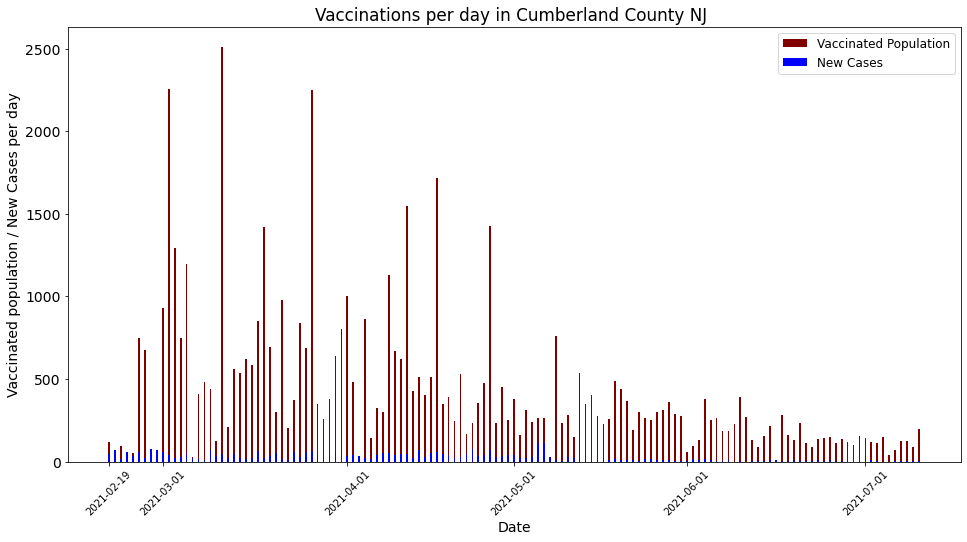

In [171]:
x_axis = county_y["date"]
values = county_y['delta_init']
  
fig = plt.figure(figsize = (16, 8))
fig.tight_layout()
# creating the bar plot
p1_C = plt.bar(x_axis, values, color ='maroon', width = 0.3)
p2_C = plt.bar(x_axis, county_y['actuals.newCases'], color ='blue', width = 0.3)
 
plt.xlabel("Date")
plt.ylabel("Vaccinated population / New Cases per day")
plt.xticks(['2021-02-19','2021-03-01','2021-04-01','2021-05-01','2021-06-01','2021-07-01'], fontsize=10, rotation=45)
plt.title("Vaccinations per day in Cumberland County NJ ")
plt.legend((p1_C[0], p2_C[0]), ('Vaccinated Population', 'New Cases'), fontsize=12)


plt.savefig("../Images/Vaccinaction_Cumberland.png")

plt.show()

### Linear regression (Vaccinations vs New Cases) 

In [173]:
#plot: setting x_values, y_values 
x_values = county_x["delta_init"]
y_values =  county_x["actuals.newCases"]


In [174]:
# Performed a linear regression on Vaccination vs New Cases
from scipy import stats
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values, creating line equation string
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

print(line_eq)

y = 0.04x +27.09


The r-squared is: 0.3879170934462184


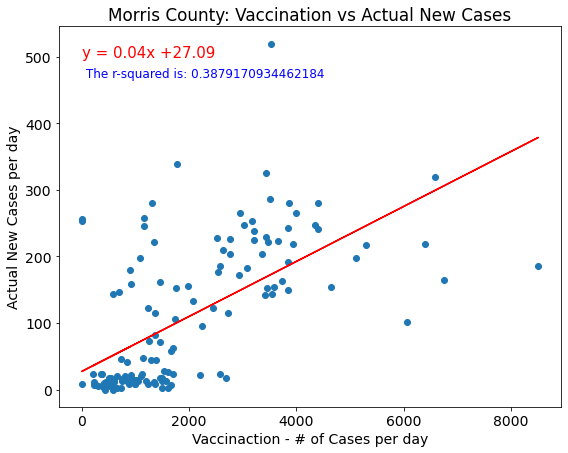

In [175]:
# Create Plot
plt.figure(figsize=(9,7))
x_values = county_x["delta_init"]
y_values =  county_x["actuals.newCases"]
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Morris County: Vaccination vs Actual New Cases")
plt.ylabel("Actual New Cases per day")
plt.xlabel("Vaccinaction - # of Cases per day")

plt.annotate(line_eq,(0,500),fontsize=15,color="red")
plt.text(0,470, (f" The r-squared is: {rvalue**2}"), fontsize = 12, color ="b")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/Linear_regr_Vaccinaction_Morris.png")

plt.show()


In [177]:
#plot: setting x_values, y_values 
x_values = county_y["delta_init"]
y_values =  county_y["actuals.newCases"]


In [178]:
# Performed a linear regression on Vaccination vs New Cases
from scipy import stats
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values, creating line equation string
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

print(line_eq)

y = 0.02x +18.24


The r-squared is: 0.1070180416583671


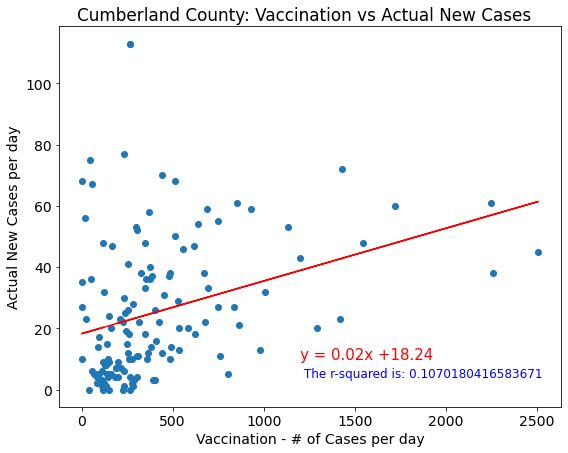

In [181]:
# Create Plot
plt.figure(figsize=(9,7))
x_values = county_y["delta_init"]
y_values =  county_y["actuals.newCases"]
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Cumberland County: Vaccination vs Actual New Cases  ")
plt.ylabel("Actual New Cases per day")
plt.xlabel("Vaccination - # of Cases per day")

plt.annotate(line_eq,(1200,10),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.text(1200,4, (f" The r-squared is: {rvalue**2}"), fontsize = 12, color ="b")
plt.savefig("../Images/Linear_regr_Vaccinaction_Cumberland.png")

plt.show()